In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("raw_dataset.csv")

In [4]:
data.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,NaN,SKU51,25.834709,60.349454,148.240593,9839.326980,Male,101.191069,4.579167,52.514944,...,Bangalore,17.808299,659.476201,28.597686,15.785458,Pending,1.852573,Road,Route A,682.447456
1,NaN,SKU92,46.582321,43.577914,269.518367,2330.905171,Male,90.584965,23.971076,9.622398,...,Mumbai,4.542223,679.854328,29.524704,65.888031,Pass,0.320937,Rail,Route B,227.637579
2,skincare,SKU14,102.374775,26.803948,555.600066,8848.978733,Non-binary,54.194908,29.348584,79.956187,...,NaN,24.896717,563.073865,13.641001,4.293649,Pending,0.040881,Air,Route B,931.131555
3,cosmetics,SKU71,5.097899,14.669751,633.834319,8025.535759,Female,77.601074,0.924028,26.114805,...,Bangalore,1.925381,261.446814,9.848635,31.698197,Pending,2.117617,Road,Route A,401.648956
4,skincare,SKU60,16.246354,15.219927,377.525193,8773.688016,Female,42.419719,27.366314,NaN,...,Mumbai,28.938758,918.507828,23.285711,88.288138,NaN,2.819114,Rail,Route A,NaN


In [5]:
data.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
2995,cosmetics,SKU23,1.865130,29.583545,363.263675,8905.210778,Unknown,81.443563,4.975928,NaN,...,Kolkata,10.522598,573.600386,29.365564,98.671003,Pending,1.289851,Rail,Route A,207.195670
2996,skincare,SKU98,20.603604,44.183753,918.727514,8365.807144,Female,53.963965,1.253108,26.243889,...,Chennai,27.933063,596.175963,8.531811,NaN,Pending,2.888014,Rail,Route A,878.369848
2997,haircare,SKU25,38.585177,73.353075,148.954942,NaN,Male,85.219024,9.810239,51.772720,...,Kolkata,18.507625,929.279502,23.247503,75.087076,Pending,3.932817,Road,Route B,425.730505
2998,skincare,SKU36,13.528250,35.596174,940.548639,7709.070181,Female,15.729781,23.223610,30.454721,...,Delhi,26.506436,675.531536,18.945997,43.415806,Fail,3.698683,Air,Route C,376.729961
2999,haircare,SKU84,87.956412,98.403777,627.985735,2143.847872,Unknown,71.933219,25.659700,79.194443,...,Chennai,24.162446,596.918847,21.657534,33.871739,NaN,4.858564,Air,Route B,479.391463


## Data Preparation and cleaning

1. Load the file using pandas
2. Look at some infromation about the data & the columns
3. Fix any missing or incorrect values

In [6]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [7]:
data.shape

(3000, 24)

In [8]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,2837.000000,2981.000000,2822.000000,2540.000000,2795.000000,2856.000000,2315.000000,2445.000000,2819.000000,2604.000000,2935.000000,2946.000000,2609.000000,2895.000000,2887.000000
mean,48.932332,48.169799,465.699895,5838.250390,48.426253,15.821160,48.764424,5.755624,5.575969,16.989614,559.517812,14.602756,47.520784,2.268908,523.193513
std,31.088706,30.286322,303.368011,2733.805630,31.575007,8.848736,26.864159,2.718927,2.672498,8.836910,258.374948,8.872995,28.624176,1.465513,258.372731
min,-1.692076,-2.317431,-33.535974,572.342015,-2.599969,0.019307,-1.845197,0.672116,0.769019,-0.208875,80.229265,-0.394868,-0.991546,-0.178151,64.831330
25%,18.679390,22.506536,186.313923,2834.670171,17.033285,8.245884,25.790708,3.665599,3.490827,9.916819,350.058164,6.868258,23.862413,0.920566,303.630520
50%,50.776891,43.577914,417.394446,6115.715056,48.097531,16.533997,52.066296,6.130607,5.355159,18.289684,559.235304,13.105864,45.713066,2.158461,514.873494
75%,76.623526,75.172368,724.503563,8323.152990,75.528043,23.837628,70.901784,7.995267,7.874310,24.677200,795.382222,22.713224,69.388415,3.575598,763.294857
max,102.374775,103.296581,1019.582619,10239.687822,104.718578,31.110203,99.066714,10.498672,10.305188,30.945566,1002.271454,31.019277,104.031680,5.061288,1034.211260


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             2321 non-null   object 
 1   SKU                      2755 non-null   object 
 2   Price                    2837 non-null   float64
 3   Availability             2981 non-null   float64
 4   Number of products sold  2822 non-null   float64
 5   Revenue generated        2540 non-null   float64
 6   Customer demographics    2635 non-null   object 
 7   Stock levels             2795 non-null   float64
 8   Lead times               2856 non-null   float64
 9   Order quantities         2315 non-null   float64
 10  Shipping times           2445 non-null   float64
 11  Shipping carriers        2471 non-null   object 
 12  Shipping costs           2819 non-null   float64
 13  Supplier name            2873 non-null   object 
 14  Location                

## Checking Missing and Duplicate values

In [9]:
data.isnull().sum()

Product type               679
SKU                        245
Price                      163
Availability                19
Number of products sold    178
Revenue generated          460
Customer demographics      365
Stock levels               205
Lead times                 144
Order quantities           685
Shipping times             555
Shipping carriers          529
Shipping costs             181
Supplier name              127
Location                   524
Lead time                  396
Production volumes          65
Manufacturing lead time     54
Manufacturing costs        391
Inspection results         432
Defect rates               105
Transportation modes       491
Routes                      81
Costs                      113
dtype: int64

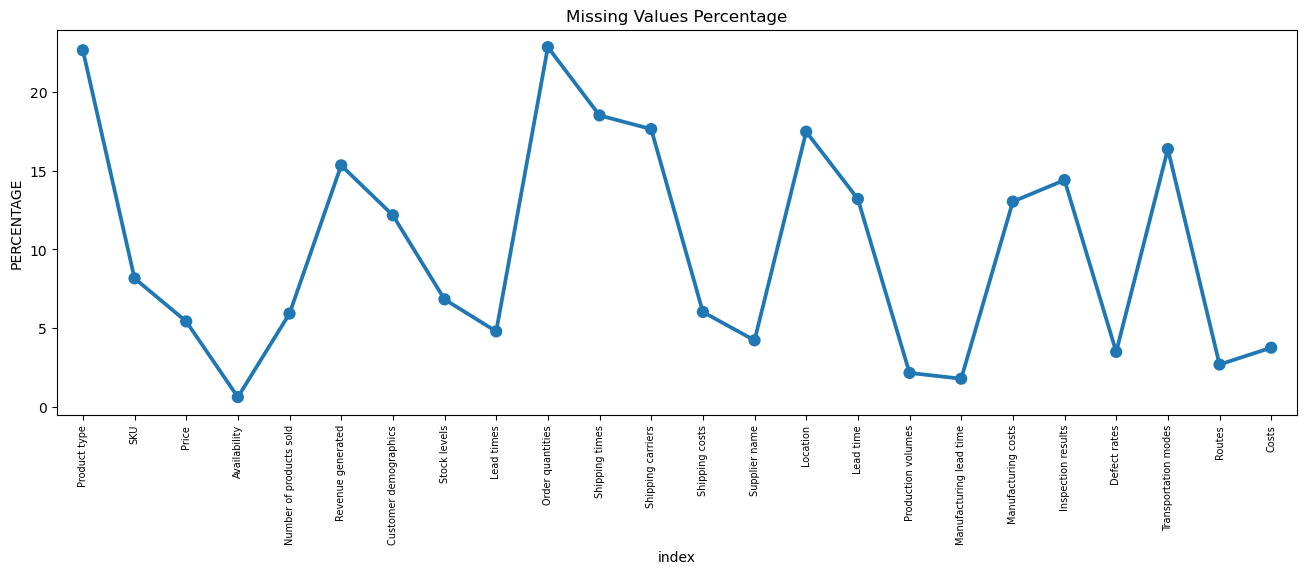

In [10]:
plt.figure(figsize = (16,5))
missing_values = pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data=missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing Values Percentage')
plt.ylabel("PERCENTAGE")
plt.show()

Imputing Missing Values

In [11]:
num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(exclude=['number']).columns

for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.to_csv("cleaned_dataset.csv", index=False)

In [12]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

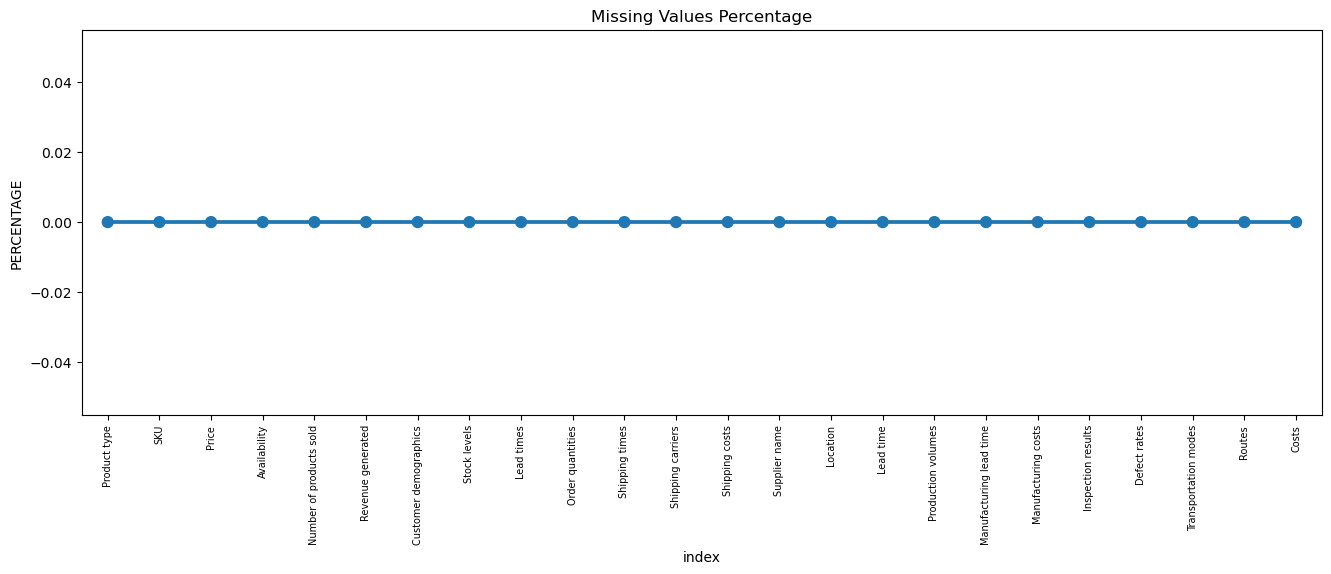

In [13]:
plt.figure(figsize = (16,5))
missing_values = pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data=missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing Values Percentage')
plt.ylabel("PERCENTAGE")
plt.show()

In [14]:
#Checking Duplicate Values
len(data[data.duplicated()])

0

In [15]:
#unique values for each column
data.nunique()

Product type                  3
SKU                         100
Price                      2838
Availability               2982
Number of products sold    2823
Revenue generated          2541
Customer demographics         4
Stock levels               2796
Lead times                 2857
Order quantities           2316
Shipping times             2446
Shipping carriers             3
Shipping costs             2820
Supplier name                 5
Location                      5
Lead time                  2605
Production volumes         2936
Manufacturing lead time    2947
Manufacturing costs        2610
Inspection results            3
Defect rates               2896
Transportation modes          4
Routes                        3
Costs                      2888
dtype: int64

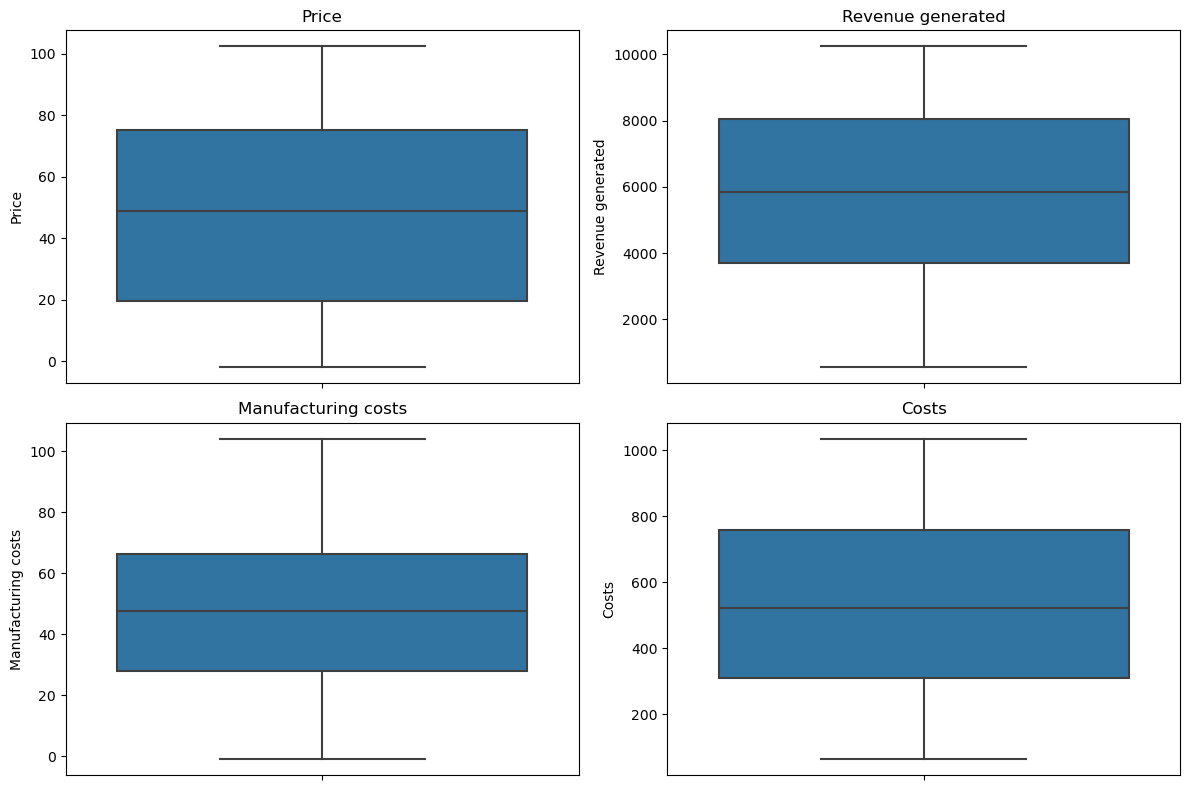

In [16]:
selected_columns = ["Price", "Revenue generated", "Manufacturing costs", "Costs"]

# Creating box plots for selected numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

## Data Visualisation

### Sales Analysis
1. Analyze number of products sold and revenue generated to understand sales performance over time.
2. Identify customer demographics to determine which groups are purchasing the most products.
3. Track availability and stock levels to ensure the right products are in stock when customers are ready to buy.

In [17]:
product_sold = data.groupby(['Product type'])[['Number of products sold', 'Revenue generated']].sum().reset_index()

In [18]:
product_sold

,Product type,Number of products sold,Revenue generated
0,cosmetics,287686.414578,3.871599e+06
1,haircare,321278.925358,4.034595e+06
2,skincare,788134.345795,9.608557e+06


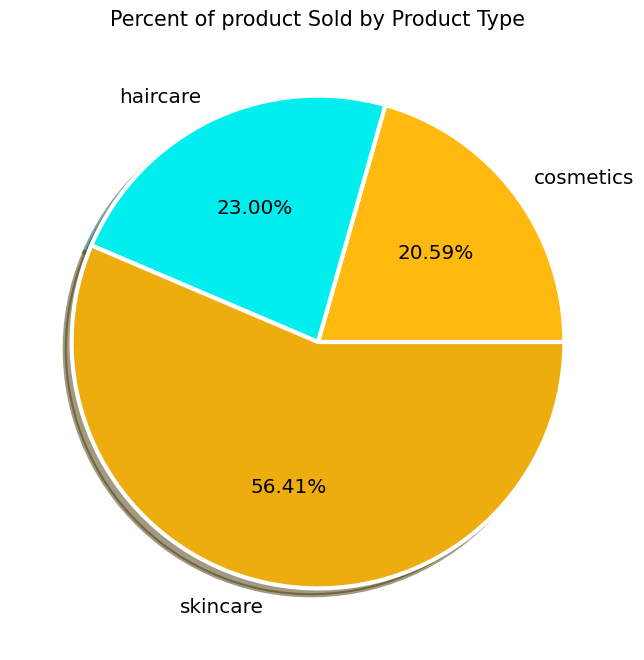

In [19]:
plt.figure(figsize = (12,8))
colors = ['#FFB90F', '#00EEEE', '#EEAD0E']
pie_chart = plt.pie(product_sold['Number of products sold'], labels = product_sold['Product type'], autopct = '%.2f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, shadow =True, colors = colors)
plt.title('Percent of product Sold by Product Type', fontsize= 15)
plt.show()

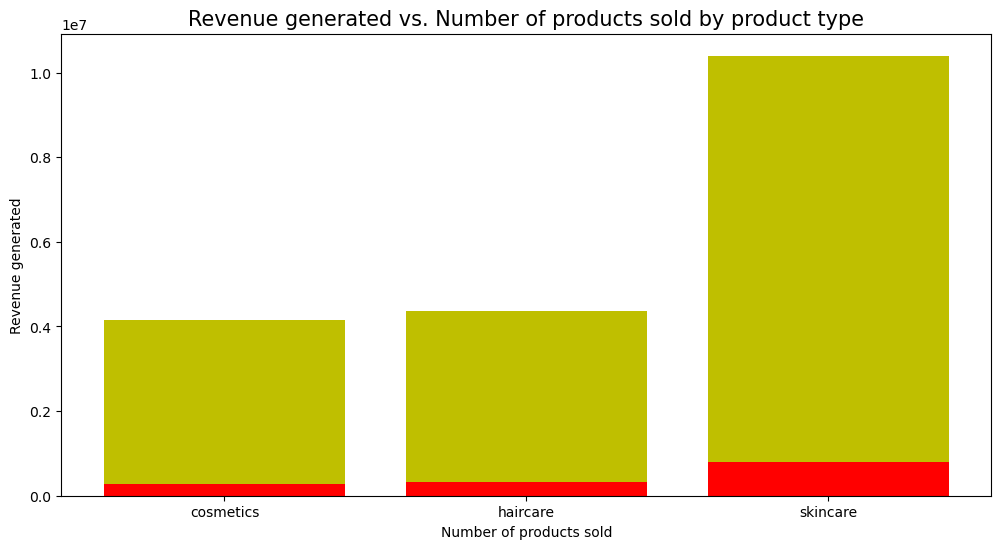

In [20]:
plt.figure(figsize = (12,6))
plt.bar(x = product_sold['Product type'], height= product_sold["Number of products sold"], color = 'r')
plt.bar(x = product_sold['Product type'], height = product_sold["Revenue generated"], bottom = product_sold["Number of products sold"],color = 'y')

plt.title("Revenue generated vs. Number of products sold by product type", fontsize = (15))
plt.xlabel("Number of products sold")
plt.ylabel("Revenue generated")
plt.show()

##### So, the highest number of products sold of the three product categories is skincare, which means 56% of business comes from skincare, 23% from haircare, and 21% from cosmetics.

##### And most of the revenue comes from skincare products, followed by haircare, and then cosmetics products.

In [21]:
data['Customer demographics'].unique()

array(['Male', 'Non-binary', 'Female', 'Unknown'], dtype=object)

In [22]:
demographics = data.groupby(['Customer demographics', 'Product type'])['Number of products sold'].sum().reset_index()

In [23]:
demographics

,Customer demographics,Product type,Number of products sold
0,Female,cosmetics,82793.095380
1,Female,haircare,23061.313646
2,Female,skincare,246844.854496
3,Male,cosmetics,60322.025261
4,Male,haircare,46743.326219
5,Male,skincare,99214.185228
6,Non-binary,cosmetics,49361.752938
7,Non-binary,haircare,59601.035075
8,Non-binary,skincare,164823.507534
9,Unknown,cosmetics,95209.540999


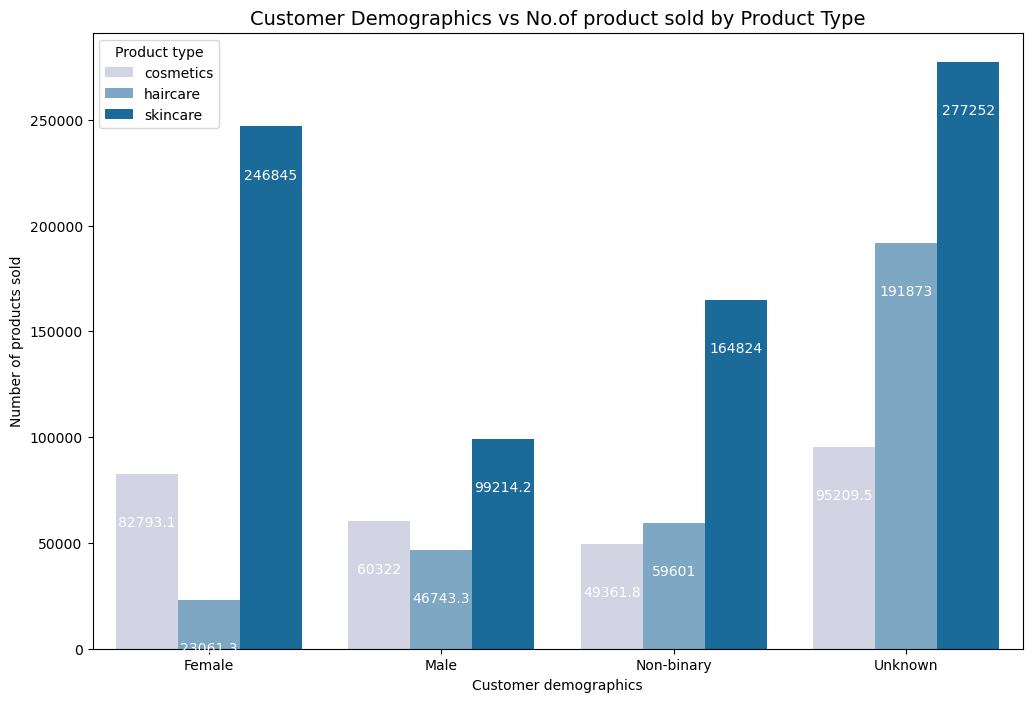

In [24]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = demographics['Customer demographics'], y = demographics['Number of products sold'], hue = demographics['Product type'], palette = 'PuBu')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.title("Customer Demographics vs No.of product sold by Product Type", fontsize = (14))
plt.show()

##### According to the graph, the female group purchases higher-quality skincare and cosmetic products, whereas the male group purchases products of about equal quality in terms of haircare and cosmetics. And an unknown group category purchases a higher quantity of all three products.

##### Skin care products are the most popular among all four product categories. Skincare products have a higher demand.

In [25]:
stock = data.groupby(['Product type'])[['Stock levels', 'Availability']].sum().reset_index()

In [26]:
stock

,Product type,Stock levels,Availability
0,cosmetics,37988.859638,32686.111977
1,haircare,37805.238835,33405.675620
2,skincare,69484.661224,78417.609831


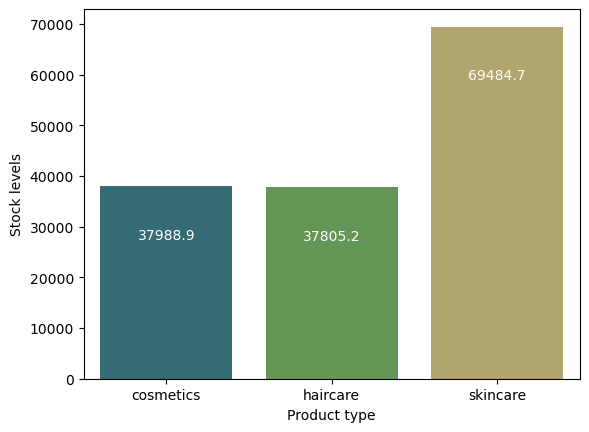

In [27]:
p = sns.barplot(x ='Product type', y =('Stock levels') , data = stock, palette = 'gist_earth')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)

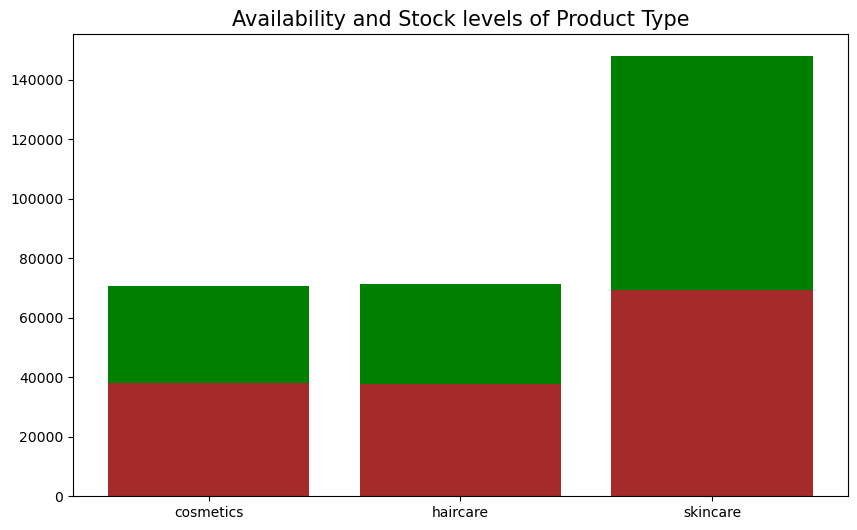

In [28]:
plt.figure(figsize = (10,6))
plt.bar(x ='Product type', height = 'Stock levels' , data = stock, color = 'brown')
plt.bar(x ='Product type', height = 'Availability' , bottom = 'Stock levels' , data = stock, color = 'green')

plt.title("Availability and Stock levels of Product Type", fontsize = (15))
plt.show()

In [29]:
data.groupby(['Product type'])[['Stock levels', 'Availability']].sum().reset_index()


,Product type,Stock levels,Availability
0,cosmetics,37988.859638,32686.111977
1,haircare,37805.238835,33405.675620
2,skincare,69484.661224,78417.609831


##### In the graph, green represents the availability and brown represents the stock levels.

##### The company holds equal stock levels of haircare and cosmetic products, while skincare has a higher stock level.

##### Skincare products have higher availability and stock levels, meaning they are readily available and can be shipped more efficiently.

##### Cosmetics and haircare have lower availability but similar stock levels, which suggests that while inventory exists, replenishment might be slower, possibly due to longer manufacturing times.

## Operations Analysis:

1. Analyze lead times, order quantities, and production volumes to optimize inventory management and reduce stockouts.
2. Track manufacturing lead time and costs to identify areas for improvement and cost savings.
3. Monitor inspection results and defect rates to identify quality issues and improve manufacturing processes.

In [30]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [31]:
product = data.groupby(['Product type'])[['Lead time', 'Order quantities', 'Production volumes']].mean().reset_index()
product['Order quantities'] = product['Order quantities'].round(2)
product['Lead time'] = product['Lead time'].round(2)
product['Production volumes'] = product['Production volumes'].round(2)

In [32]:
product

,Product type,Lead time,Order quantities,Production volumes
0,cosmetics,13.90,50.71,472.83
1,haircare,18.19,45.54,583.25
2,skincare,17.64,49.56,582.64


##### Haircare products have the longest lead time and highest production volume, which may indicate more complex manufacturing requirements or supply chain constraints.

##### Cosmetics have the shortest lead time despite having the lowest production volume, suggesting that factors other than production scale—such as manufacturing efficiency or supply chain agility—may influence lead times.

In [33]:
avg_costs = data.groupby(['Manufacturing lead time'])['Manufacturing costs'].mean().reset_index().sort_values(by = 'Manufacturing costs')
avg_costs['Manufacturing costs'] = avg_costs['Manufacturing costs'].round(2)

In [34]:
avg_costs

,Manufacturing lead time,Manufacturing costs
2092,21.074972,-0.99
2128,21.466827,-0.98
2340,23.725979,-0.87
2327,23.566037,-0.84
2297,23.301097,-0.72
...,...,...
64,1.140885,101.83
9,0.387821,101.84
2846,29.217083,101.86
2811,28.870137,102.08


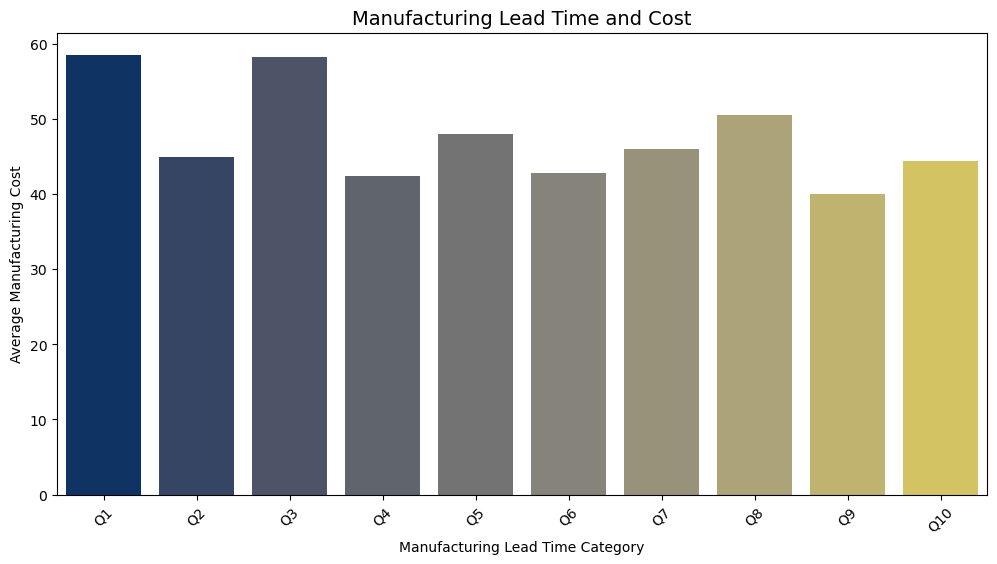

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert lead time into categories to avoid too many bars
avg_costs['Lead Time Category'] = pd.qcut(avg_costs['Manufacturing lead time'], q=10, labels=[f'Q{i+1}' for i in range(10)])

# Aggregate manufacturing costs
avg_costs_grouped = avg_costs.groupby('Lead Time Category')['Manufacturing costs'].mean().reset_index()

plt.figure(figsize=(12, 6))  # Reduce figure size for clarity
p = sns.barplot(x=avg_costs_grouped['Lead Time Category'], y=avg_costs_grouped['Manufacturing costs'], palette='cividis')

# Add bar labels only if not too many
if len(p.containers[0]) < 20:
    for container in p.containers:
        p.bar_label(container, padding=5, color='white', fontsize=10)

plt.title('Manufacturing Lead Time and Cost', fontsize=14)
plt.xlabel('Manufacturing Lead Time Category')
plt.ylabel('Average Manufacturing Cost')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()


In [36]:
rate = data.groupby(['Product type', 'Inspection results'])['Defect rates'].mean().reset_index()
rate['Defect rates'] = rate['Defect rates'].round(2)

In [37]:
rate

,Product type,Inspection results,Defect rates
0,cosmetics,Fail,2.02
1,cosmetics,Pass,1.72
2,cosmetics,Pending,1.65
3,haircare,Fail,2.58
4,haircare,Pass,3.03
5,haircare,Pending,2.41
6,skincare,Fail,2.71
7,skincare,Pass,1.86
8,skincare,Pending,2.32


In [38]:
data['Defect rates'].mean()

2.268907514187537

In [39]:
data['Defect rates'].max()

5.06128769890841

In [40]:
data['Defect rates'].min()

-0.1781507091495069

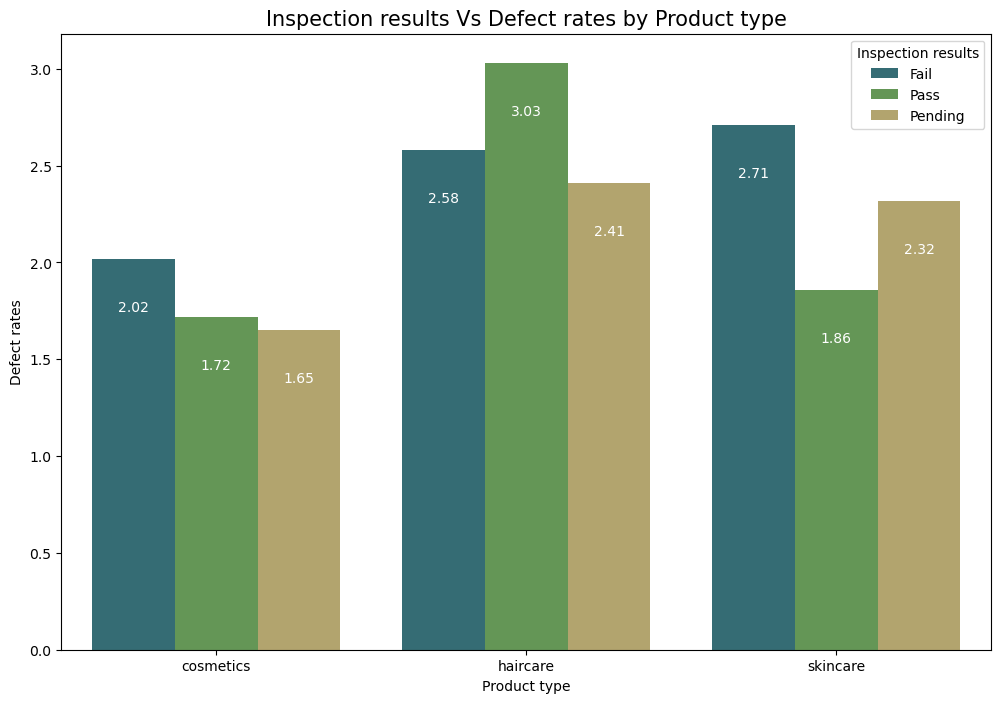

In [41]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = rate['Product type'], y = rate['Defect rates'], hue = rate['Inspection results'], palette = 'gist_earth')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
    
plt.title("Inspection results Vs Defect rates by Product type", fontsize = (15))
plt.show()

##### All product categories have a higher defect rate.

## Shipping Analysis:

1. Analyze costs, transportation modes, and routes to optimize logistics and reduce shipping costs.
2. Monitor shipping times, shipping carriers, modes of transportation to ensure timely delivery to customers.
3. Track shipping costs associated with shipping carriers and revenue generated to identify areas for cost savings

In [42]:
shipping = data.groupby(['Shipping carriers'])['Shipping costs'].sum().reset_index()

In [43]:
shipping

,Shipping carriers,Shipping costs
0,Carrier A,4031.589156
1,Carrier B,8731.077916
2,Carrier C,3965.240851


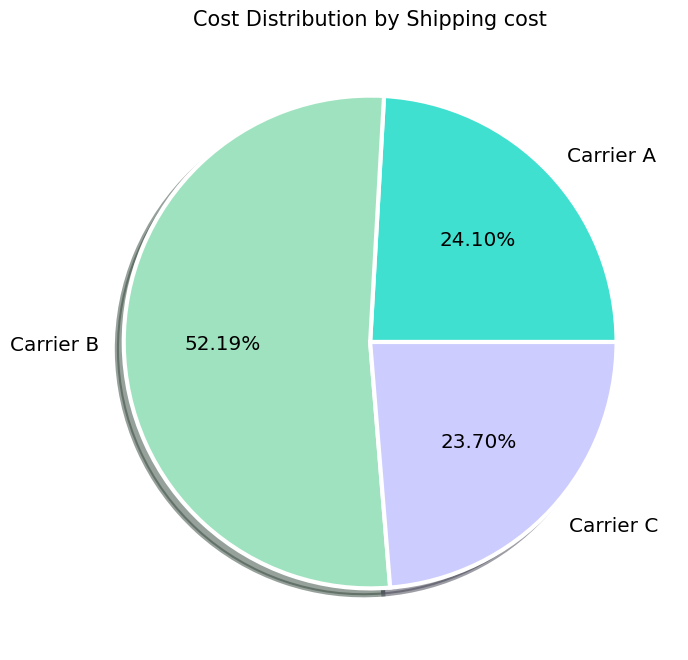

In [44]:
plt.figure(figsize = (12,8))
colors = ['#40E0D0', '#9FE2BF','#CCCCFF']
plt.pie( shipping['Shipping costs'], labels = shipping['Shipping carriers'],autopct = '%.2f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, shadow =True, colors = colors)
plt.title('Cost Distribution by Shipping cost', fontsize = (15))
plt.show()

In [45]:
carrier_revenue = data.groupby(['Shipping carriers'])['Revenue generated'].sum().reset_index()
carrier_revenue['Revenue generated'] = carrier_revenue['Revenue generated'].round(2)

In [46]:
carrier_revenue

,Shipping carriers,Revenue generated
0,Carrier A,3735579.71
1,Carrier B,9285135.98
2,Carrier C,4494035.48


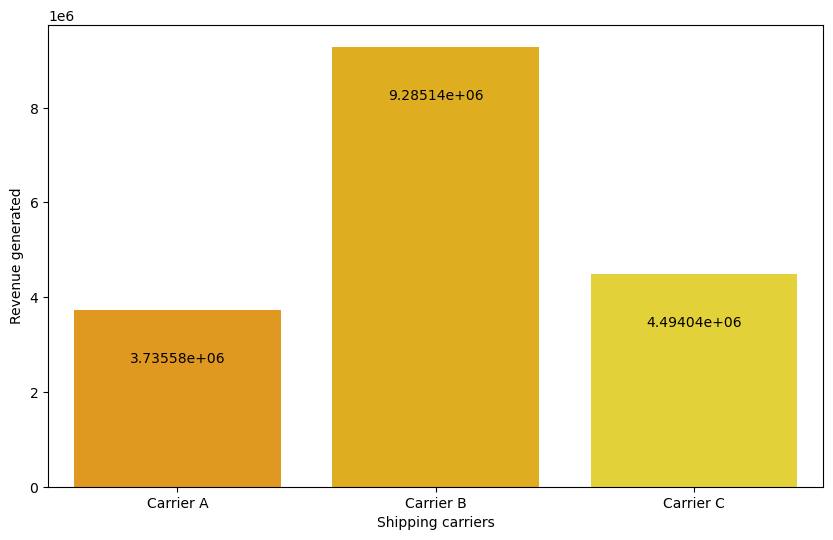

In [47]:
plt.figure(figsize = (10,6))
p = sns.barplot(x = carrier_revenue['Shipping carriers'], y = carrier_revenue['Revenue generated'], palette = 'Wistia_r')
for container in p.containers:
    p.bar_label(container,padding=-40, color='black', fontsize=10)

plt.show()

##### Both the graphs clearly show shipping carrier B is costly as well as generating higher revenue.

In [48]:
transport = data.groupby(['Transportation modes', 'Routes'])['Costs'].sum().reset_index()

In [49]:
transport

,Transportation modes,Routes,Costs
0,Air,Route A,175347.464298
1,Air,Route B,111836.250532
2,Air,Route C,91500.427262
3,Rail,Route A,169736.780354
4,Rail,Route B,164965.613418
5,Rail,Route C,32440.824735
6,Road,Route A,257238.192856
7,Road,Route B,283682.302646
8,Road,Route C,117175.974565
9,Sea,Route A,60307.923154


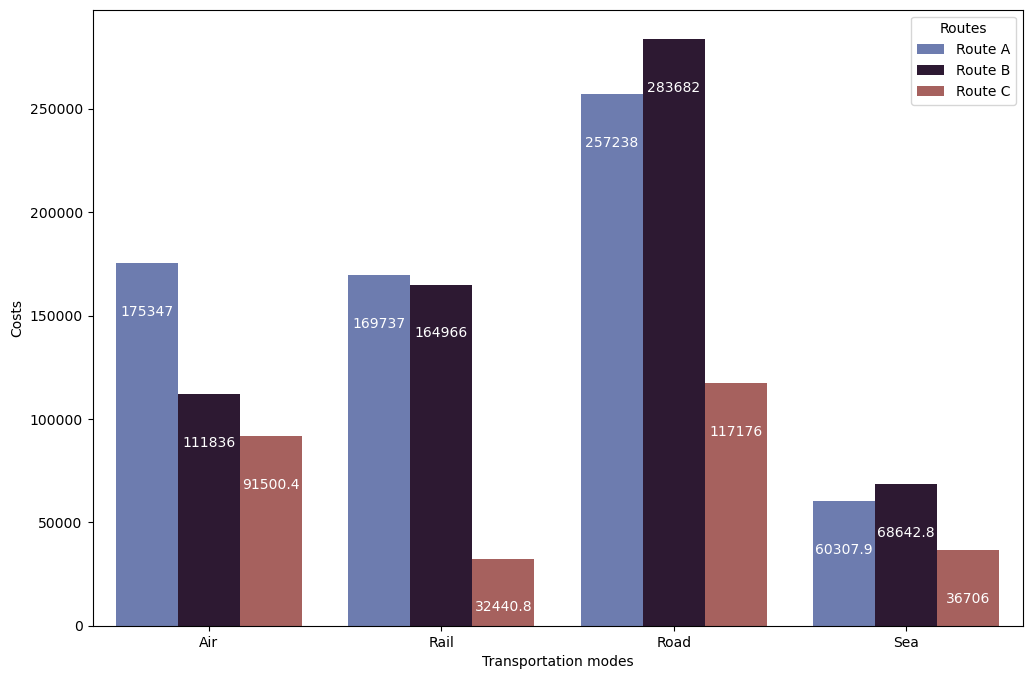

In [50]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = transport['Transportation modes'], y = transport['Costs'], hue = transport['Routes'], palette = 'twilight')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.show()

In [51]:
shipping = data.groupby(['Shipping carriers', 'Transportation modes'])['Shipping times'].mean().reset_index()
shipping['Shipping times'] = shipping['Shipping times'].round(2)
shipping

,Shipping carriers,Transportation modes,Shipping times
0,Carrier A,Air,5.59
1,Carrier A,Rail,7.43
2,Carrier A,Road,5.74
3,Carrier A,Sea,6.82
4,Carrier B,Air,4.81
5,Carrier B,Rail,6.31
6,Carrier B,Road,5.10
7,Carrier B,Sea,6.66
8,Carrier C,Air,6.63
9,Carrier C,Rail,6.01


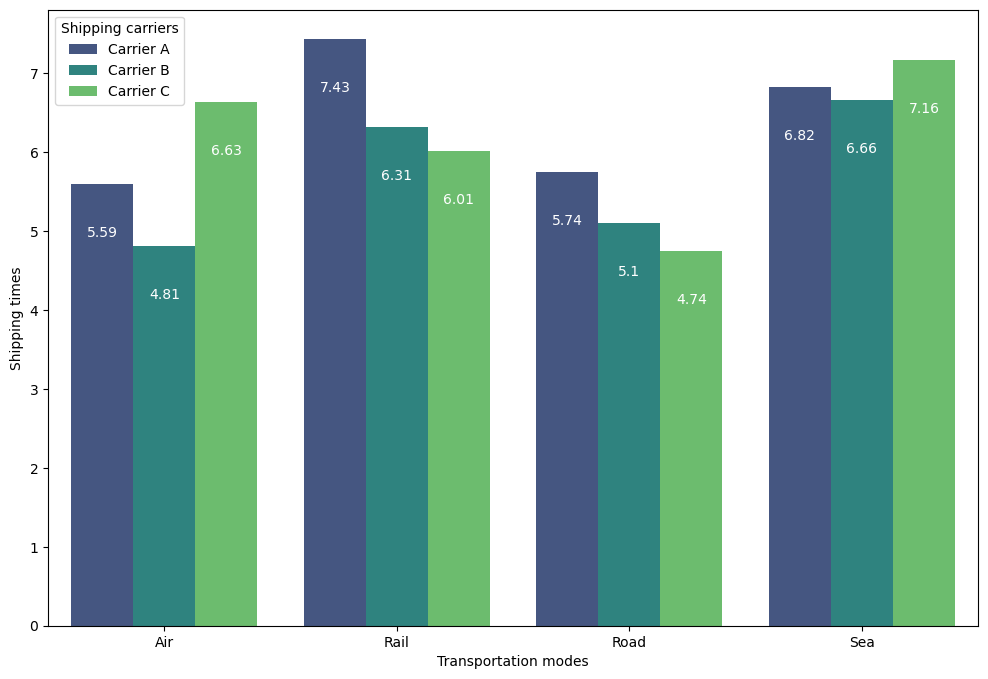

In [52]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = shipping['Transportation modes'], y = shipping['Shipping times'], hue = shipping['Shipping carriers'], palette = 'viridis')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.show() 

##### According to the graph, the fastest and most efficient shipping option is Carrier B in all four transportation modes.

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Define column names
columns = [
    'Product type', 'SKU', 'Price', 'Availability',
    'Number of products sold', 'Revenue generated', 'Customer demographics',
    'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
    'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
    'Lead time', 'Production volumes', 'Manufacturing lead time',
    'Manufacturing costs', 'Inspection results', 'Defect rates',
    'Transportation modes', 'Routes', 'Costs'
]